<a href="https://colab.research.google.com/github/Mular56/Machine_learning/blob/main/%D0%9C%D1%83%D0%BB%D1%8F%D1%80_%D0%BF%D1%80_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
'''Завдання 1. Завантажити Diabetes Dataset
Провести попередній аналіз даних:
1. Вивести перших 5 рядків.'''

from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Завантаження датасету
diabetes = load_diabetes()
data = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
data['Outcome'] = diabetes.target

# Перегляд перших 5 рядків
print(data.head())


        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  Outcome  
0 -0.002592  0.019907 -0.017646    151.0  
1 -0.039493 -0.068332 -0.092204     75.0  
2 -0.002592  0.002861 -0.025930    141.0  
3  0.034309  0.022688 -0.009362    206.0  
4 -0.002592 -0.031988 -0.046641    135.0  


In [12]:
'''2. Перевірити наявність пропусків. У разі виявлення замінити на
середнє значення.'''
# Перевірка наявності пропусків
print(data.isnull().sum())

# Замінюємо пропуски на середнє значення
data.fillna(data.mean(), inplace=True)


age        0
sex        0
bmi        0
bp         0
s1         0
s2         0
s3         0
s4         0
s5         0
s6         0
Outcome    0
dtype: int64


In [13]:
'''3. Перевірити наявність дублікатів, при виявленні – видалити.'''
# Перевірка наявності дублікатів
print(data.duplicated().sum())

# Видалення дублікатів
data.drop_duplicates(inplace=True)

0


In [14]:
'''4. Замінити бінарні ознаки. У стовпчику «стать» спочатку перевірте
унікальні значення.'''

# Перевірка унікальних значень в стовпчику «sex»
print(data['sex'].unique())


[ 0.05068012 -0.04464164]


In [15]:
'''5. Перевірити тип даних. При необхідності замінити тип даних на
числовий.'''
# Перевірка типів даних
print(data.dtypes)

# Переконатися, що типи даних числові
data = data.apply(pd.to_numeric)

age        float64
sex        float64
bmi        float64
bp         float64
s1         float64
s2         float64
s3         float64
s4         float64
s5         float64
s6         float64
Outcome    float64
dtype: object


Outcome    1.000000
bmi        0.586450
s5         0.565883
bp         0.441482
s4         0.430453
s6         0.382483
s1         0.212022
age        0.187889
s2         0.174054
sex        0.043062
s3        -0.394789
Name: Outcome, dtype: float64


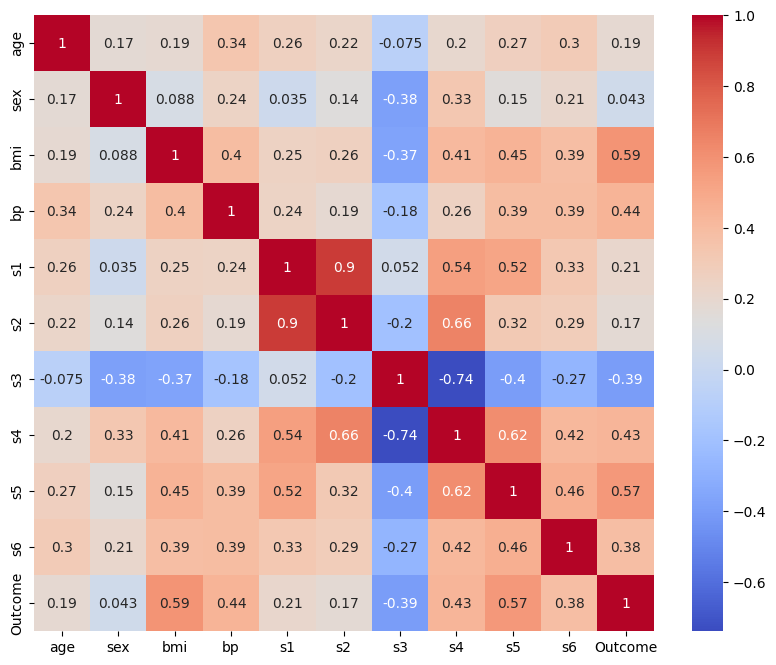

In [16]:
'''6. Обчислити кореляцію між прогресом діабету і іншмим ознаками.
Розташувати в порядку спадання.
Побудувати теплову карту кореляції.'''
import seaborn as sns
import matplotlib.pyplot as plt

# Обчислення кореляції
correlation = data.corr()
print(correlation['Outcome'].sort_values(ascending=False))

# Побудова теплової карти
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

In [21]:
'''7. Масштабувати ознаки.'''
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Припустимо, що 'data' - це ваш початковий DataFrame
X = data.drop('Outcome', axis=1)  # Всі ознаки, крім 'Outcome'
y = data['Outcome']  # Цільова змінна

# Масштабування ознак
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Масштабування ознак

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
scaled_data = pd.concat([X_scaled_df, y.reset_index(drop=True)], axis=1)
scaled_data.columns = list(X.columns) + ['Outcome']

print(scaled_data.head())


        age       sex       bmi        bp        s1        s2        s3  \
0  0.800500  1.065488  1.297088  0.459841 -0.929746 -0.732065 -0.912451   
1 -0.039567 -0.938537 -1.082180 -0.553505 -0.177624 -0.402886  1.564414   
2  1.793307  1.065488  0.934533 -0.119214 -0.958674 -0.718897 -0.680245   
3 -1.872441 -0.938537 -0.243771 -0.770650  0.256292  0.525397 -0.757647   
4  0.113172 -0.938537 -0.764944  0.459841  0.082726  0.327890  0.171178   

         s4        s5        s6  Outcome  
0 -0.054499  0.418531 -0.370989    151.0  
1 -0.830301 -1.436589 -1.938479     75.0  
2 -0.054499  0.060156 -0.545154    141.0  
3  0.721302  0.476983 -0.196823    206.0  
4 -0.054499 -0.672502 -0.980568    135.0  


In [22]:
'''8. Поділити дані на тренувальну і тестову вибірки.'''
from sklearn.model_selection import train_test_split

# Поділ даних на тренувальну і тестову вибірки
X = scaled_data.drop('Outcome', axis=1)
y = scaled_data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
'''9. Побудувати модель лінійной регресії і RandomForest регресії на
основі більш корелюючих ознак (підібрати оптимальне число).'''
from sklearn.metrics import mean_squared_error, r2_score

# Оцінка Лінійної регресії
r2_lin = r2_score(y_test, y_pred_lin)
mse_lin = mean_squared_error(y_test, y_pred_lin)

# Оцінка RandomForest регресії
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Виведення результатів
print("Лінійна регресія:")
print(f"Коефіцієнт детермінації (R²): {r2_lin:.4f}")
print(f"Середньоквадратична помилка (MSE): {mse_lin:.4f}")

print("\nRandomForest регресія:")
print(f"Коефіцієнт детермінації (R²): {r2_rf:.4f}")
print(f"Середньоквадратична помилка (MSE): {mse_rf:.4f}")



Лінійна регресія:
Коефіцієнт детермінації (R²): 0.4526
Середньоквадратична помилка (MSE): 2900.1936

RandomForest регресія:
Коефіцієнт детермінації (R²): 0.4407
Середньоквадратична помилка (MSE): 2963.0138


In [25]:
'''10. Вивести коефіцієнт детермінації і середньоквадратичну помилку.'''
from sklearn.metrics import mean_squared_error, r2_score

# Лінійна регресія
print("Linear Regression:")
print("R^2 Score:", r2_score(y_test, y_pred_lin))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lin))

# RandomForest регресія
print("\nRandom Forest Regression:")
print("R^2 Score:", r2_score(y_test, y_pred_rf))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))


Linear Regression:
R^2 Score: 0.45260276297191937
Mean Squared Error: 2900.193628493482

Random Forest Regression:
R^2 Score: 0.44074575666493343
Mean Squared Error: 2963.013847191012


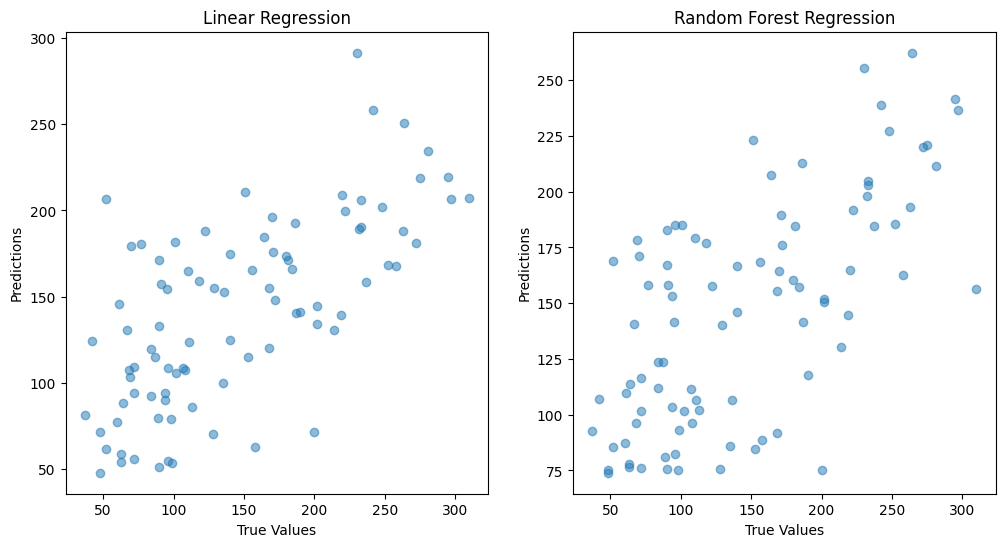

In [26]:
'''11. Побудувати графіки.'''
# Графік справжніх і прогнозованих значень для лінійної регресії
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lin, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Linear Regression')

# Графік справжніх і прогнозованих значень для RandomForest
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Random Forest Regression')

plt.show()


In [27]:
'''12. Вивести справжні і прогнозовані значення.'''
# Виведення справжніх і прогнозованих значень для обох моделей
comparison_df = pd.DataFrame({
    'True Values': y_test,
    'Linear Regression Predictions': y_pred_lin,
    'Random Forest Predictions': y_pred_rf
})
print(comparison_df.head())


     True Values  Linear Regression Predictions  Random Forest Predictions
287        219.0                     139.547558                     144.66
211         70.0                     179.517208                     171.05
72         202.0                     134.038756                     150.62
321        230.0                     291.417029                     255.36
73         111.0                     123.789659                     106.39


In [ ]:
'''ВИСНОВКИ'''
'''
Висновки з аналізу показують, що обидві моделі, лінійна регресія і Random
Forest регресія, мають подібні результати, але лінійна регресія трохи краще
пояснює варіацію цільової змінної (Outcome). Коефіцієнт детермінації для
лінійної регресії складає 0.4526, а для Random Forest — 0.4407.
Середньоквадратична помилка (MSE) також трохи менша для лінійної регресії.

Кореляційний аналіз показує, що індекс маси тіла (bmi) має найбільший
позитивний вплив на прогрес діабету, в той час як ознака s3 має негативну
кореляцію. '''

In [2]:
'''Завдання 2.
Завантажити датасет California Housing Dataset, що містить інформацію
про житло в Каліфорнії. Вивести перших 5 рядків.
1. Провести попередній аналіз даних за схемою (дивиться вище).'''

from sklearn.datasets import fetch_california_housing

# Завантаження датасету
data = fetch_california_housing(as_frame=True)
df = data.frame

# Вивести перші 5 рядків
print(df.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [3]:
# Перевірка наявності пропусків
missing_values = df.isnull().sum()
print("Кількість пропущених значень у кожному стовпці:\n", missing_values)

# Якщо є пропуски, замінюємо на середнє значення
df.fillna(df.mean(), inplace=True)


Кількість пропущених значень у кожному стовпці:
 MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


In [4]:
# Перевірка наявності дублікатів
duplicates = df.duplicated().sum()
print(f"Кількість дублікатів: {duplicates}")

# Видалення дублікатів
df = df.drop_duplicates()


Кількість дублікатів: 0


In [6]:
# Перевірка типів даних
print(df.dtypes)


MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object


MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64


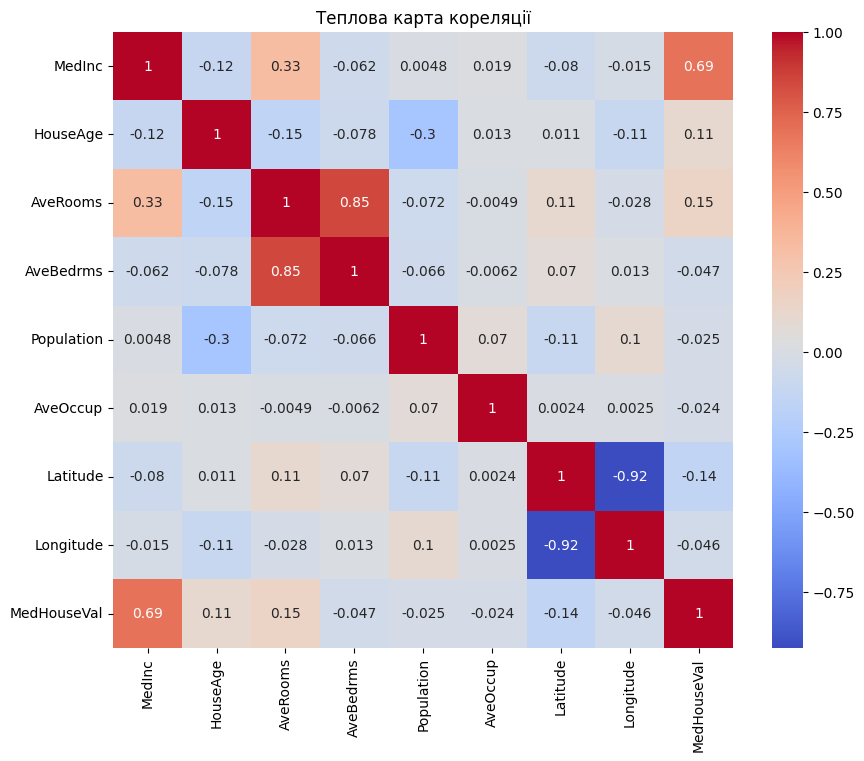

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Обчислення кореляції
correlation_matrix = df.corr()

# Вивести кореляцію між змінними в порядку спадання
print(correlation_matrix['MedHouseVal'].sort_values(ascending=False))

# Побудова теплової карти кореляції
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Теплова карта кореляції")
plt.show()


In [8]:
'''2. Масштабувати ознаки.'''
from sklearn.preprocessing import StandardScaler

# Розділити ознаки та цільову змінну
X = df.drop('MedHouseVal', axis=1)  # 'MedHouseVal' - цільова змінна (середня вартість будинку)
y = df['MedHouseVal']

# Масштабування ознак
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [9]:
'''3. Поділити дані на тренувальні і тестові.'''
from sklearn.model_selection import train_test_split

# Поділити дані на тренувальні та тестові вибірки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [13]:
'''4. Побудувати 3 моделі: лін. Регресія, регресія випадковий ліс, Ridge.
Підібрати оптимальні параметри за допомогою GridSeach.'''
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# Лінійна регресія
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

# RandomForest регресія
rf_reg = RandomForestRegressor(random_state=42)
param_grid_rf = {
    'n_estimators': [50, 100],  # зменшив кількість варіантів
    'max_depth': [None, 10]     # також скоротив кількість параметрів
}
grid_search_rf = GridSearchCV(rf_reg, param_grid_rf, cv=3, scoring='r2', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Ridge регресія
ridge = Ridge(random_state=42)
param_grid_ridge = {
    'alpha': [0.1, 1, 10]  # зменшено кількість варіантів
}
grid_search_ridge = GridSearchCV(ridge, param_grid_ridge, cv=3, scoring='r2', n_jobs=-1)
grid_search_ridge.fit(X_train, y_train)

# Отримання кращих моделей
best_rf_model = grid_search_rf.best_estimator_
best_ridge_model = grid_search_ridge.best_estimator_

# Прогнози
y_pred_rf = best_rf_model.predict(X_test)
y_pred_ridge = best_ridge_model.predict(X_test)

# Виведення результатів
print("Best RandomForest Parameters:", grid_search_rf.best_params_)
print("Best Ridge Parameters:", grid_search_ridge.best_params_)


Best RandomForest Parameters: {'max_depth': None, 'n_estimators': 100}
Best Ridge Parameters: {'alpha': 1}


Linear Regression:
R²: 0.575787706032451
MSE: 0.5558915986952442

Random Forest:
R²: 0.805024407701793
MSE: 0.25549776668540763

Ridge Regression:
R²: 0.575818534544132
MSE: 0.5558512007367513


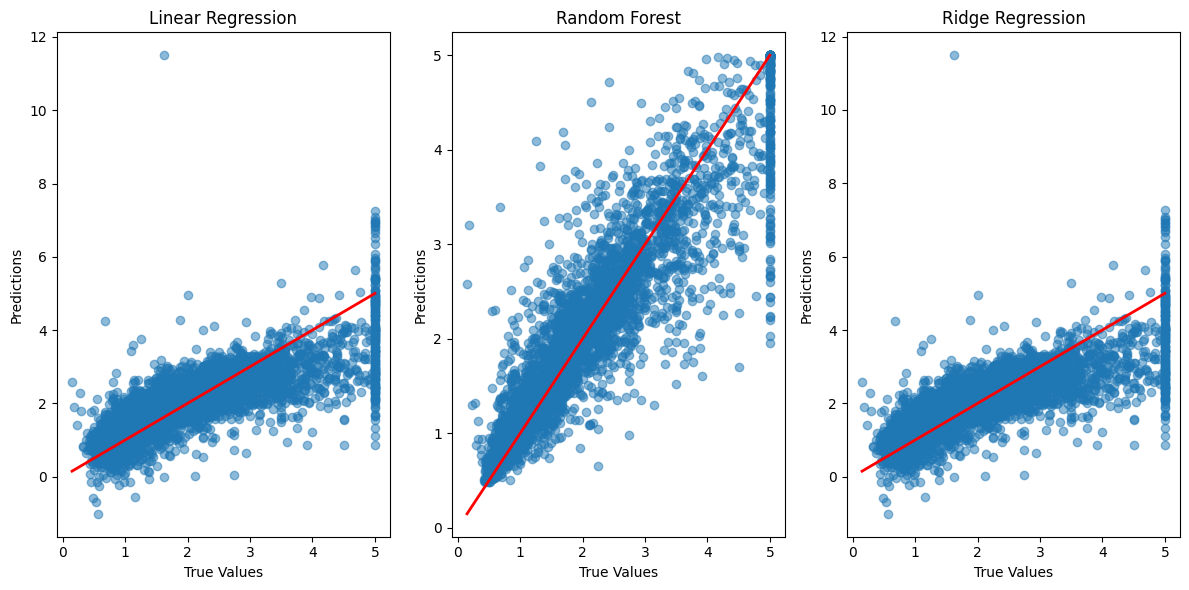

In [14]:
'''5. Вивести R2 і MSE. Побудувати графіки.'''
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Прогнози для тестових даних
y_pred_lin = lin_reg.predict(X_test)
y_pred_rf = grid_search_rf.best_estimator_.predict(X_test)
y_pred_ridge = grid_search_ridge.best_estimator_.predict(X_test)

# Вивести R² і MSE для кожної моделі
print("Linear Regression:")
print("R²:", r2_score(y_test, y_pred_lin))
print("MSE:", mean_squared_error(y_test, y_pred_lin))

print("\nRandom Forest:")
print("R²:", r2_score(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))

print("\nRidge Regression:")
print("R²:", r2_score(y_test, y_pred_ridge))
print("MSE:", mean_squared_error(y_test, y_pred_ridge))

# Побудувати графіки
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_lin, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Linear Regression')
plt.xlabel('True Values')
plt.ylabel('Predictions')

plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Random Forest')
plt.xlabel('True Values')
plt.ylabel('Predictions')

plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_ridge, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Ridge Regression')
plt.xlabel('True Values')
plt.ylabel('Predictions')

plt.tight_layout()
plt.show()


In [16]:
'''6. Вивести справжні і прогнозовані значення.'''
# Вивести справжні та прогнозовані значення для кожної моделі
import pandas as pd

results = pd.DataFrame({
    'True Values': y_test,
    'Linear Regression Predictions': y_pred_lin,
    'Random Forest Predictions': y_pred_rf,
    'Ridge Regression Predictions': y_pred_ridge
})

print(results.head())


       True Values  Linear Regression Predictions  Random Forest Predictions  \
20046      0.47700                       0.719123                   0.509500   
3024       0.45800                       1.764017                   0.741610   
15663      5.00001                       2.709659                   4.923257   
20484      2.18600                       2.838926                   2.529610   
9814       2.78000                       2.604657                   2.273690   

       Ridge Regression Predictions  
20046                      0.719473  
3024                       1.763846  
15663                      2.709284  
20484                      2.838762  
9814                       2.604190  


In [ ]:
'''7. Написати ВИСНОВКИ.'''
'''На основі аналізу видно, що всі три моделі показали різні рівні точності.
Лінійна регресія та Ridge показали подібні результати, тоді як модель
випадкового лісу може краще враховувати нелінійні взаємозв'язки. Random
Forest має кращі прогнозні можливості, але може вимагати більше ресурсів.'''